In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load data
sent_agg = pd.read_csv('C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/output_data/sentiment_aggregation.csv')
sent_res = pd.read_csv('C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/output_data/sentiment_analysis_results.csv')
theme_res = pd.read_csv('C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/output_data/thematic_analysis_results.csv')
task2 = pd.read_csv('C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/data/task2_output.csv')

# Output directory
output_dir = 'C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots'
os.makedirs(output_dir, exist_ok=True)

# Unique banks
banks = theme_res['bank'].unique()

####  1. **Sentiment Distribution per Bank**

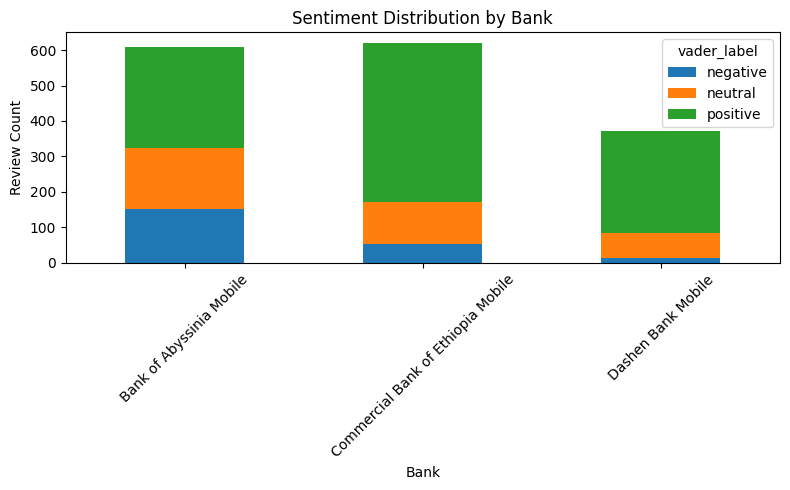

<Figure size 640x480 with 0 Axes>

In [42]:
sent_agg = sent_res.groupby(['bank', 'vader_label']).size().unstack(fill_value=0)
sent_agg.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Sentiment Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots/sentiment_distribution_by_bank.png', dpi=300)


#### 2. **Theme Frequency per Bank**

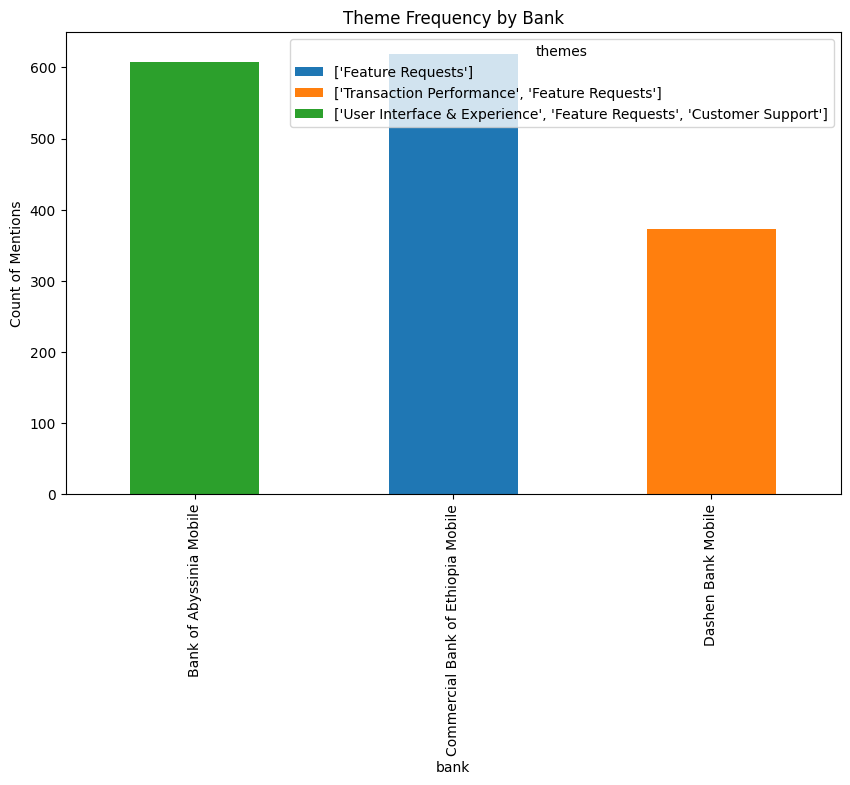

In [43]:
theme_freq = theme_res.groupby(['bank','themes']).size().unstack(fill_value=0)
theme_freq.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Theme Frequency by Bank')
plt.ylabel('Count of Mentions')
plt.savefig('C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots/theme_frequency_by_bank.png', dpi=300)

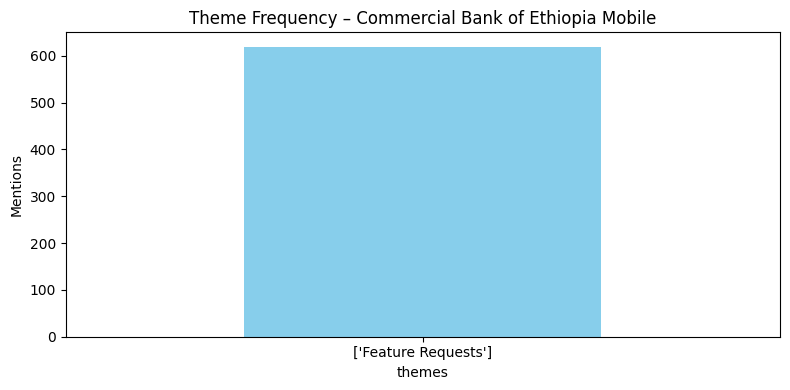

Saved: C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots/theme_frequency_commercial_bank_of_ethiopia_mobile.png


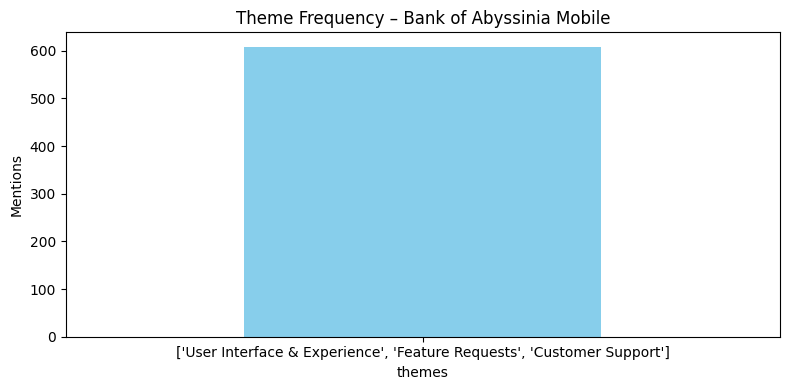

Saved: C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots/theme_frequency_bank_of_abyssinia_mobile.png


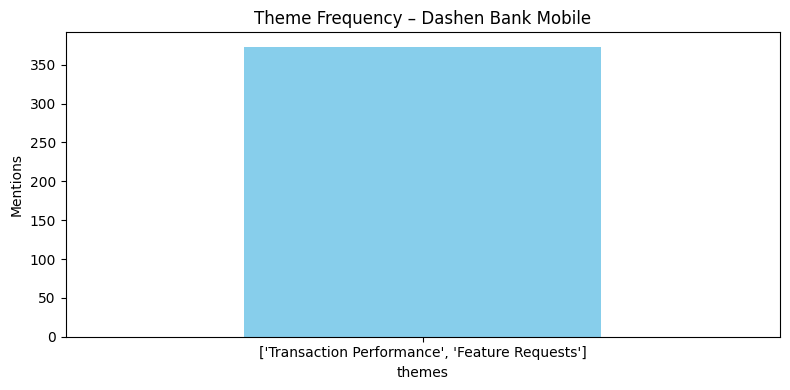

Saved: C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots/theme_frequency_dashen_bank_mobile.png


In [44]:
# Plot and display for each bank
for bank in banks:
    bank_data = theme_res[theme_res['bank'] == bank]
    theme_count = bank_data['themes'].value_counts()

    plt.figure(figsize=(8, 4))
    theme_count.plot(kind='bar', color='skyblue')
    plt.title(f'Theme Frequency – {bank}')
    plt.ylabel('Mentions')
    plt.xticks(rotation=0)  # Horizontal labels
    plt.tight_layout()

    # Show plot in Jupyter Notebook
    plt.show()

    # Save the figure
    filename = f'{output_dir}/theme_frequency_{bank.replace(" ", "_").lower()}.png'
    plt.savefig(filename, dpi=300)
    print(f"Saved: {filename}")

    plt.close()

#### 3. **Word Cloud — Negative Reviews - per bank**

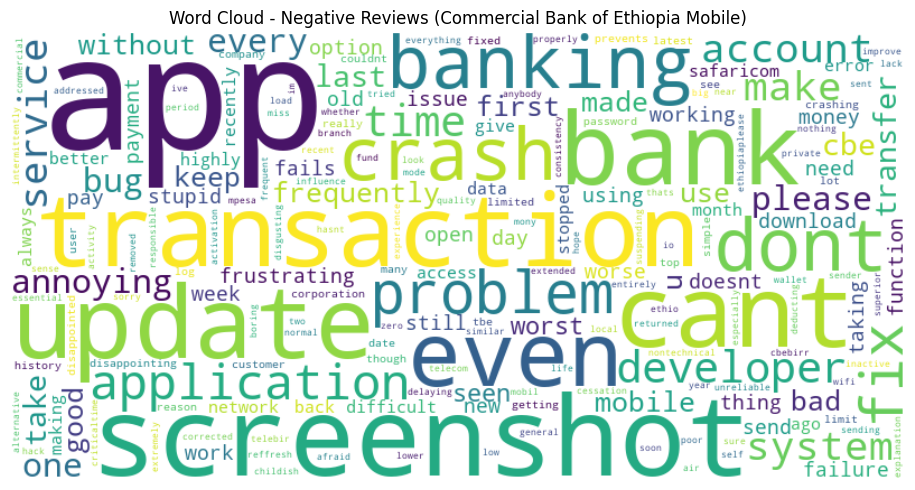

Saved: C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots/wordcloud_negative_commercial_bank_of_ethiopia_mobile.png


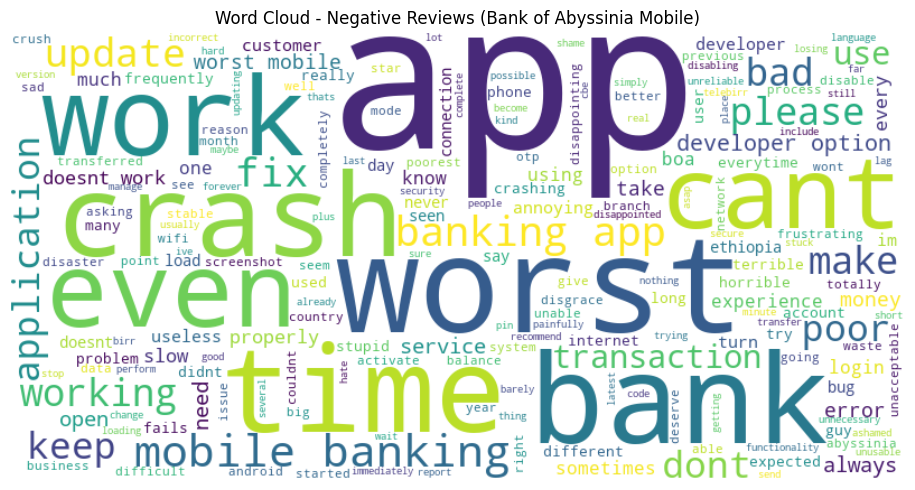

Saved: C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots/wordcloud_negative_bank_of_abyssinia_mobile.png


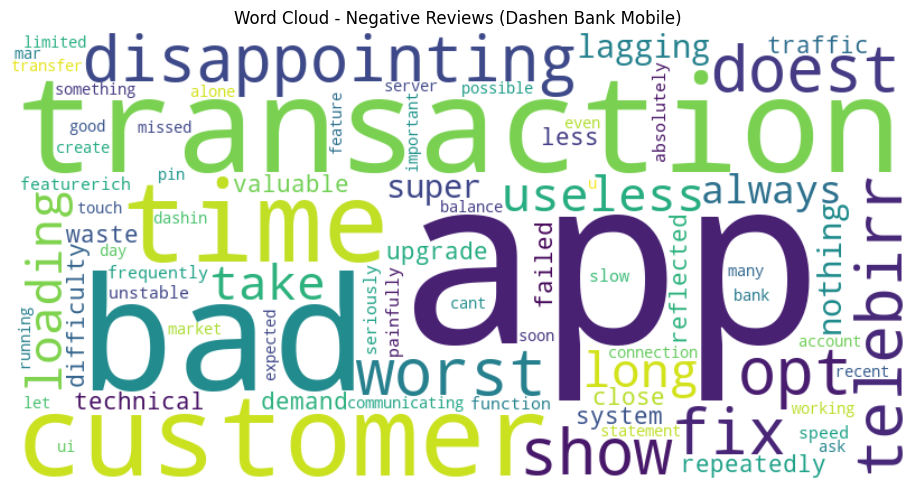

Saved: C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots/wordcloud_negative_dashen_bank_mobile.png


In [45]:
import os

# Load sentiment analysis results
sentiment_df = pd.read_csv('C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/output_data/sentiment_analysis_results.csv')

# Create output directory if it doesn't exist
output_dir = 'C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots'
os.makedirs(output_dir, exist_ok=True)

# Generate and display word cloud for each bank (only for negative reviews)
for bank in sentiment_df['bank'].unique():
    bank_df = sentiment_df[(sentiment_df['bank'] == bank) & (sentiment_df['vader_label'].str.lower() == 'negative')]
    
    text = " ".join(bank_df['cleaned_text'].dropna().astype(str))
    
    if text.strip():  # Proceed only if there is valid negative review text
        wc = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Display in Jupyter Notebook
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud - Negative Reviews ({bank})')
        plt.tight_layout()
        plt.show()

        # Save the figure
        filename = f'{output_dir}/wordcloud_negative_{bank.replace(" ", "_").lower()}.png'
        wc.to_file(filename)
        print(f"Saved: {filename}")
    else:
        print(f"No negative reviews found for {bank}.")

#### 4. 📉 **Rating vs Sentiment Score – Per Bank**

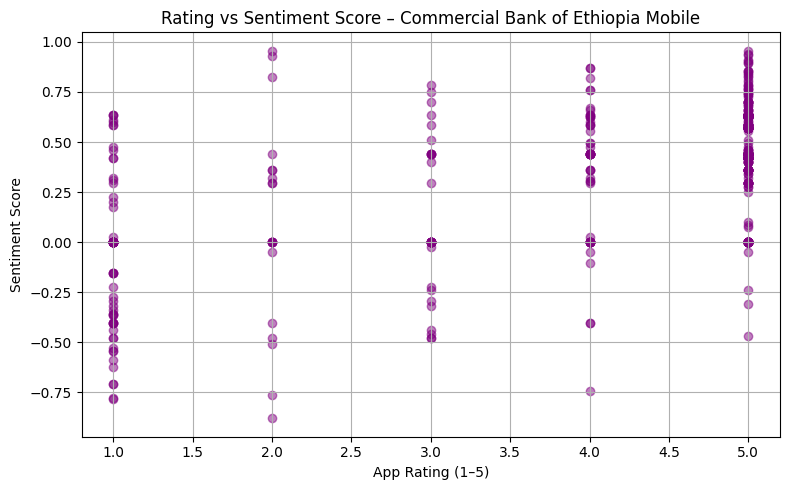

Saved: C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots/rating_vs_sentiment_commercial_bank_of_ethiopia_mobile.png


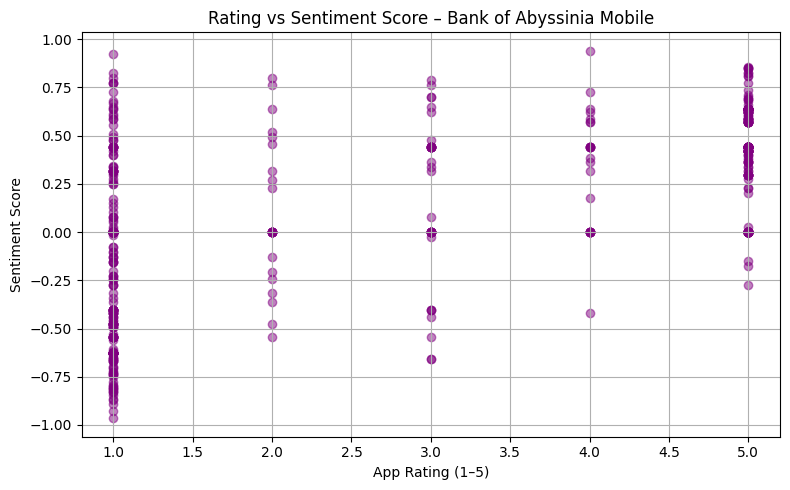

Saved: C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots/rating_vs_sentiment_bank_of_abyssinia_mobile.png


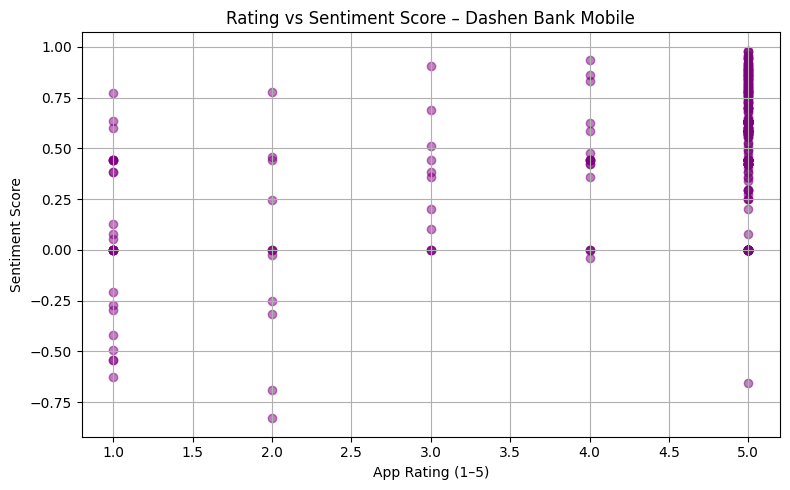

Saved: C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots/rating_vs_sentiment_dashen_bank_mobile.png


In [47]:
# Plot per bank
for bank in sent_res['bank'].unique():
    bank_data = sent_res[sent_res['bank'] == bank]

    if not bank_data.empty:
        plt.figure(figsize=(8, 5))
        plt.scatter(bank_data['rating'], bank_data['vader_score'], alpha=0.5, color='purple')
        plt.title(f'Rating vs Sentiment Score – {bank}')
        plt.xlabel('App Rating (1–5)')
        plt.ylabel('Sentiment Score')
        plt.grid(True)
        plt.tight_layout()

        # Show in Jupyter
        plt.show()

        # Save figure
        filename = f"{output_dir}/rating_vs_sentiment_{bank.replace(' ', '_').lower()}.png"
        plt.savefig(filename, dpi=300)
        print(f"Saved: {filename}")

        plt.close()

### **5. 📉Sentiment Trend Over Time – Per Bank**

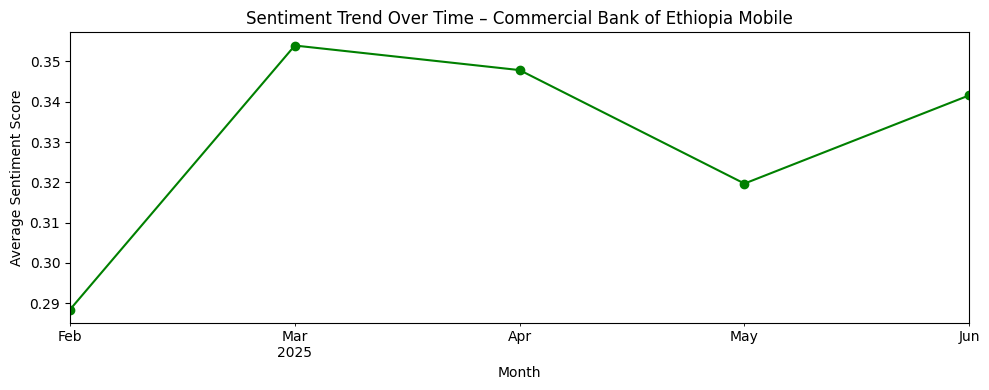

Saved: C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots/sentiment_trend_commercial_bank_of_ethiopia_mobile.png


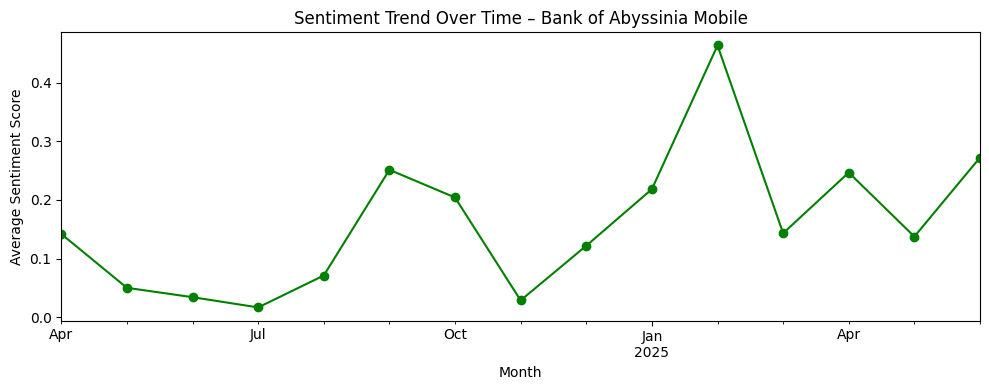

Saved: C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots/sentiment_trend_bank_of_abyssinia_mobile.png


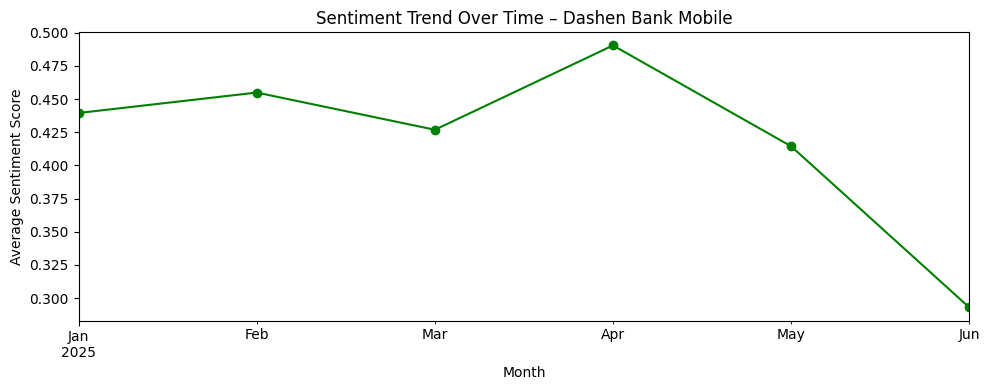

Saved: C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots/sentiment_trend_dashen_bank_mobile.png


In [48]:
sent_res['date'] = pd.to_datetime(sent_res['date'])

# Output folder
output_dir = 'C:/Users/Admin/Desktop/KAIM/week 2/Fintech_ux_analytics_week_02/task4/plots'
os.makedirs(output_dir, exist_ok=True)

# Plot sentiment trends per bank
for bank in sent_res['bank'].unique():
    bank_data = sent_res[sent_res['bank'] == bank]
    trend = bank_data.set_index('date').resample('ME')['vader_score'].mean()

    if not trend.empty:
        plt.figure(figsize=(10, 4))
        trend.plot(marker='o', color='green')
        plt.title(f'Sentiment Trend Over Time – {bank}')
        plt.ylabel('Average Sentiment Score')
        plt.xlabel('Month')
        plt.tight_layout()

        # Show in notebook
        plt.show()

        # Save to file
        filename = f"{output_dir}/sentiment_trend_{bank.replace(' ', '_').lower()}.png"
        plt.savefig(filename, dpi=300)
        print(f"Saved: {filename}")

        plt.close()